# 중간 프로젝트(선형 회귀)

### 다음은 지난 10일동안 도시에서 순찰 중인 경찰관(officers)와 보고된 범죄(crime)의 수를 나타낸다.

|Day|officers|crime||Day|officers|crime|
|---|--------|-----||---|--------|-----|
|1|10|5||6|6|8|
|2|15|2||7|18|1|
|3|16|1||8|12|5|
|4|1|9||9|14|3|
|5|4|7||10|7|6|

#### 선형 회귀 모델을 구하여라 (프로그램으로 구현하라는뜻) 
- 학습은 4000-5000번 수행하며, 손실함수는 평균제곱오차
- 최적화는 경사하강기법 이용하며 학습률은 0.001로 정함
- 경찰관의 수는 비종속변수(X), 범죄의 수는 종족 변수(Y)
- 구현된 모델을 이용하여 30명의 경찰관이 순찰을 할 때 예측되는 범죄의 수를 출력하시오
- 데이터와 완성된 모델은 matplot을 이용하여 그림으로 보여줄 것

 Y 값이 음수로 나와도 상관없음


=== Test ===
officers: 30, crime: [-2.452516]


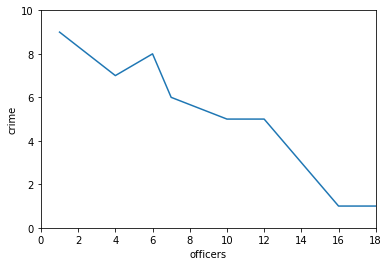

In [66]:
import tensorflow as tf
import matplotlib.pyplot as plt

x_data = [10, 15, 16,1,4,6,18,12,14,7] #경찰
y_data = [5, 2, 1,9,7,8,1,5,3,6]#범인
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) 
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

X = tf.placeholder(tf.float32, name="officers")
Y = tf.placeholder(tf.float32, name="crime")


hypothesis = W * X + b#hypothesis실제값 Y = W * X + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))#tf.reduce_mean평균  tf.square제곱  손실함수

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)#GradientDescentOptimizer경사하강기법 #learning_rate학습률

train_op = optimizer.minimize(cost)

with tf.Session() as sess: #with자동으로 세션 클로즈
    sess.run(tf.global_variables_initializer())
    for step in range(4000): 
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data}) 
        
        
    print("\n=== Test ===") 
    print("officers: 30, crime:", sess.run(hypothesis, feed_dict={X: 30})) 
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
ax.set_xlim([0, 18])
ax.set_ylim([0, 10])
x = [1,4,6,7,10,12,14,15,16,18] 
y = [9,7,8,6,5,5,3,2,1,1]
plt.xlabel('officers')
plt.ylabel('crime')
plt.plot(x,y)
plt.show()